### Uploading File on Google.Colab

In [2]:
#from google.colab import files
#uploaded = files.upload()


## Applying CNN on Feature Extracted

#### Data Preproccessing

In [2]:
import numpy as np
import pandas as pd

data = pd.DataFrame(np.load("dataset.npy",allow_pickle= True))
data.columns = ['feature', 'label']

from sklearn.preprocessing import LabelEncoder

X = np.array(data.feature.tolist())
y = np.array(data.label.tolist())
from sklearn.model_selection import train_test_split
X,val_x,y,val_y = train_test_split(X,y)
lb = LabelEncoder()

from keras.utils import np_utils

y = np_utils.to_categorical(lb.fit_transform(y))
val_y = np_utils.to_categorical(lb.fit_transform(val_y))

#### Model Structure


In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 



num_labels = y.shape[1]
filter_size = 3



# build model
model = Sequential()


model.add(Dense(512, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               20992     
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
__________

In [22]:
model.fit(X, y, batch_size=64, epochs=32, validation_data=(val_x, val_y))

Train on 6549 samples, validate on 2183 samples
Epoch 1/32
6549/6549 [==============================] - 0s 72us/step - loss: 0.4265 - acc: 0.8568 - val_loss: 0.3563 - val_acc: 0.8891
Epoch 2/32
6549/6549 [==============================] - 0s 69us/step - loss: 0.4225 - acc: 0.8603 - val_loss: 0.3453 - val_acc: 0.8873
Epoch 3/32
6549/6549 [==============================] - 0s 72us/step - loss: 0.4436 - acc: 0.8507 - val_loss: 0.3464 - val_acc: 0.8928
Epoch 4/32
6549/6549 [==============================] - 0s 69us/step - loss: 0.4218 - acc: 0.8612 - val_loss: 0.3415 - val_acc: 0.8933
Epoch 5/32
6549/6549 [==============================] - 0s 72us/step - loss: 0.4201 - acc: 0.8597 - val_loss: 0.3552 - val_acc: 0.8942
Epoch 6/32
6549/6549 [==============================] - 0s 69us/step - loss: 0.4222 - acc: 0.8614 - val_loss: 0.3505 - val_acc: 0.8905
Epoch 7/32
6549/6549 [==============================] - 0s 71us/step - loss: 0.4029 - acc: 0.8636 - val_loss: 0.3542 - val_acc: 0.8887
Epoch 8

## **Implementing XGBOOST Algorithm on same Dataset**

In [0]:
train = np.argmax(y,axis =  1)

In [7]:
train.shape

(6549,)

In [0]:
test = np.argmax(val_y,axis =  1)

In [17]:
x =X
X.shape


(6549, 40)

In [0]:
test_x = val_x

In [0]:
from xgboost import XGBClassifier

In [0]:
model = XGBClassifier(learning_rate =0.1, 
                      n_estimators=280, 
                      max_depth=5,
                      min_child_weight=1, 
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.8,
                      objective= 'binary:logistic', 
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=60)


In [33]:
model.fit(x,train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=280, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=60,
              silent=None, subsample=0.8, verbosity=1)

In [0]:
pred = model.predict(test_x)

In [35]:
test

array([2, 0, 8, ..., 4, 2, 8])

In [36]:
pred

array([2, 0, 9, ..., 4, 2, 8])

In [37]:
import sklearn.metrics as met
met.accuracy_score(test, pred)

0.9092991296381127

In [38]:
met.confusion_matrix(test, pred)

array([[241,   0,   2,   2,   0,   0,   0,   1,   0,   3],
       [  1,  75,   4,   0,   2,   1,   0,   3,   1,   7],
       [  0,   0, 214,   7,   2,   0,   1,   1,   1,  17],
       [  2,   2,  12, 204,   3,   2,   1,   0,   5,  13],
       [  0,   0,   2,   4, 235,   1,   0,  12,   1,   5],
       [  0,   0,   3,   3,   1, 254,   0,   0,   2,   2],
       [  0,   0,   6,   7,   0,   0,  77,   0,   0,   1],
       [  0,   0,   0,   0,   6,   2,   0, 245,   0,   2],
       [  0,   0,   4,   5,   0,   1,   0,   0, 227,   1],
       [  0,   0,  21,   0,   2,   1,   0,   3,   4, 213]])

## **Implementing Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
from pip._internal import main
main(["install","progressbar"])
import progressbar
import time

  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built progressbar


In [0]:
score = []
l = [i for i in range(50,300,25)]
for i in range(50,300,25):
  model = RandomForestClassifier(n_estimators=i ,criterion = "entropy", bootstrap= False)
  model.fit(x,train)
  pred = model.predict(test_x)
  score.append(met.accuracy_score(test, pred))
  

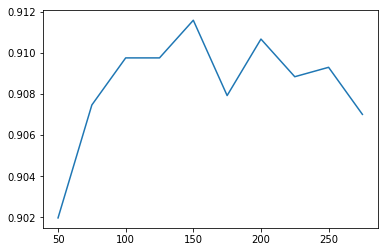

In [76]:

from matplotlib import pyplot as plt
plt.plot(l,score)
plt.show()

In [78]:
test

array([2, 0, 8, ..., 4, 2, 8])